![image](Sensorpic.png)

In [1]:
RandomState=42 #Choose same number for reproducibility

In [18]:
from Tools.PlotTools import *
import os
import Config as Conf
os.system("mkdir -p " + Conf.OutputDir)

0

In [3]:
import pandas as pd
df_final = pd.read_csv(Conf.DataFile, header=None)
print("Total photos : "+str(len(df_final)))
df_final.head()

Total photos : 258


,0,1,2,3,4,5,6,7,8,9,...,5419,5420,5421,5422,5423,5424,5425,5426,5427,5428
0,photo\sensorphoto-100-1.BMP,11,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,1.414214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,photo\sensorphoto-102-1.BMP,11,2.5,5.242641,2.0,5.828427,0.5,2.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,photo\sensorphoto-104-1.BMP,0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,photo\sensorphoto-106-1.BMP,0,0.0,1.000000,0.0,0.000000,15.0,20.656854,0.5,2.414214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,photo\sensorphoto-108-1.BMP,11,17.0,23.071068,0.0,0.000000,2.5,6.414214,6.0,13.485281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Fill all empty (NaN) columns with zeros
df_final.fillna(0,inplace=True)

#Rather than 0,1,2,3,4, I want to name them F1,F2,F3 etc.
df_final.columns=["F"+str(i) for i in range(1, 5429+1)]

#Check first few rows
df_final.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F5420,F5421,F5422,F5423,F5424,F5425,F5426,F5427,F5428,F5429
0,photo\sensorphoto-100-1.BMP,11,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,photo\sensorphoto-102-1.BMP,11,2.5,5.242641,2.0,5.828427,0.5,2.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,photo\sensorphoto-104-1.BMP,0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,photo\sensorphoto-106-1.BMP,0,0.0,1.000000,0.0,0.000000,15.0,20.656854,0.5,2.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,photo\sensorphoto-108-1.BMP,11,17.0,23.071068,0.0,0.000000,2.5,6.414214,6.0,13.485281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Get all the column names
Col=df_final.columns.to_list()

#Features except name and label
features=Col
features.remove("F1") #Remove image name
features.remove("F2") #Remove Label name
print("Features = "+str(len(features)))

#Create label
df_final['Scratched'] = 0
df_final.loc[df_final['F2'] ==11,'Scratched'] = 1
df_final.loc[df_final['F2'] ==1,'Scratched'] = 1

cat='Scratched'

print("Background = "+str(len(df_final.query(cat+"==0"))))
print("Signal = "+str(len(df_final.query(cat+"==1"))))

df_final['Wt'] = 1

df_final.head()

Features = 5427
Background = 86
Signal = 172


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F5422,F5423,F5424,F5425,F5426,F5427,F5428,F5429,Scratched,Wt
0,photo\sensorphoto-100-1.BMP,11,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,photo\sensorphoto-102-1.BMP,11,2.5,5.242641,2.0,5.828427,0.5,2.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,photo\sensorphoto-104-1.BMP,0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,photo\sensorphoto-106-1.BMP,0,0.0,1.000000,0.0,0.000000,15.0,20.656854,0.5,2.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,photo\sensorphoto-108-1.BMP,11,17.0,23.071068,0.0,0.000000,2.5,6.414214,6.0,13.485281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [6]:
testSize=Conf.testSize #70%
from sklearn.model_selection import train_test_split
TrainIndices, TestIndices = train_test_split(df_final.index.values.tolist(), test_size=testSize, random_state=RandomState, shuffle=True)

In [7]:
df_final.loc[TrainIndices,'Dataset'] = "Train"
df_final.loc[TestIndices,'Dataset'] = "Test"

df_final.loc[TrainIndices,'TrainDataset'] = 1
df_final.loc[TestIndices,'TrainDataset'] = 0

In [8]:
import numpy as np
X_train = np.asarray(df_final.loc[TrainIndices,features])
Y_train = np.asarray(df_final.loc[TrainIndices,cat])

X_test = np.asarray(df_final.loc[TestIndices,features])
Y_test = np.asarray(df_final.loc[TestIndices,cat])

RunDNN=True

In [9]:
if RunDNN:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    DNNDict=Conf.DNNDict
    modelDNN=DNNDict['model']
    modelDNN.compile(loss='binary_crossentropy', optimizer=Adam(lr=DNNDict['lr']), metrics=['accuracy',])
    
    if DNNDict['earlyStop']:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        train_history = modelDNN.fit(X_train,Y_train,epochs=DNNDict['epochs'],batch_size=DNNDict['batchsize'],validation_data=(X_test,Y_test),
                                 verbose=1,callbacks=[es])
    else:
        train_history = modelDNN.fit(X_train,Y_train,epochs=DNNDict['epochs'],batch_size=DNNDict['batchsize'],validation_data=(X_test,Y_test),
                                 verbose=1)
    #modelDNN.save(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"modelDNN.h5")
    df_final.loc[TrainIndices,"DNN"+"_pred"]=modelDNN.predict(X_train)
    df_final.loc[TestIndices,"DNN"+"_pred"]=modelDNN.predict(X_test)

W0329 12:36:09.508039 140236135757632 deprecation.py:323] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 180 samples, validate on 78 samples
Epoch 1/100
180/180 [==============================] - 8s 43ms/sample - loss: 652.5021 - acc: 0.4833 - val_loss: 517.2212 - val_acc: 0.5513
Epoch 2/100
180/180 [==============================] - 7s 39ms/sample - loss: 353.9079 - acc: 0.8056 - val_loss: 377.0755 - val_acc: 0.6410
Epoch 3/100
180/180 [==============================] - 6s 35ms/sample - loss: 88.4814 - acc: 0.8944 - val_loss: 580.0353 - val_acc: 0.5256
Epoch 4/100
180/180 [==============================] - 6s 32ms/sample - loss: 180.5537 - acc: 0.8500 - val_loss: 754.3939 - val_acc: 0.6410
Epoch 5/100
180/180 [==============================] - 7s 40ms/sample - loss: 27.2916 - acc: 0.9444 - val_loss: 764.3109 - val_acc: 0.6410
Epoch 6/100
180/180 [==============================] - 7s 39ms/sample - loss: 73.6716 - acc: 0.9611 - val_loss: 627.7111 - val_acc: 0.5256
Epoch 7/100
180/180 [==============================] - 7s 40ms/sample - loss: 58.7884 - acc: 0.9556 - val_loss: 695.94

 Plotting output response for DNN


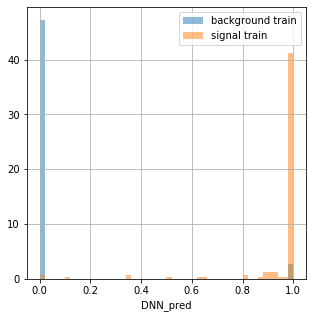

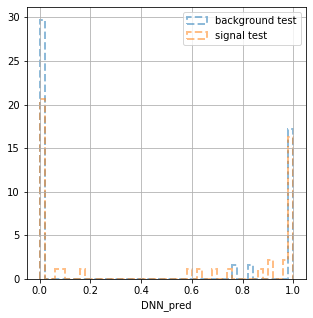

In [11]:
if RunDNN:
    prGreen("Plotting output response for DNN")
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    plot_mva(df_final.query('TrainDataset==1'),"DNN_pred",bins=np.linspace(0, 1, 51),cat=cat,ax=axes,sample='train',ls='dashed',logscale=False)
    plt.savefig(Conf.OutputDir+"/TrainMVA.png")
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    plot_mva(df_final.query('TrainDataset==0'),"DNN_pred",bins=np.linspace(0, 1, 51),cat=cat,ax=axes,sample='test',ls='dashed',logscale=False)
    plt.savefig(Conf.OutputDir+"/TestMVA.png")

In [12]:
df_final.loc[df_final["DNN_pred"]>0.5,"predlabel"]=1
df_final.loc[df_final["DNN_pred"]<0.5,"predlabel"]=0

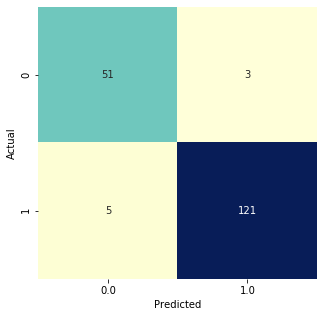

In [19]:
import seaborn as sns
confusion_matrix = pd.crosstab(df_final.query('TrainDataset==1')[cat], df_final.query('TrainDataset==1')["predlabel"], rownames=['Actual'], colnames=['Predicted'])
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns_plot=sns.heatmap(confusion_matrix,cmap="YlGnBu", annot=True, cbar=False,fmt='g',ax=axes)
plt.savefig(Conf.OutputDir+"/confusion_matrix_train.png")

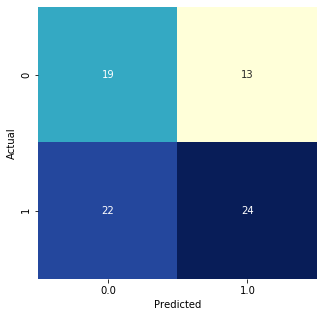

In [21]:
import seaborn as sns
confusion_matrix = pd.crosstab(df_final.query('TrainDataset==0')[cat], df_final.query('TrainDataset==0')["predlabel"], rownames=['Actual'], colnames=['Predicted'])
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns_plot=sns.heatmap(confusion_matrix,cmap="YlGnBu", annot=True, cbar=False,fmt='g',ax=axes)
plt.savefig(Conf.OutputDir+"/confusion_matrix_test.png")